In [ ]:
import numpy as np
import sys
import math as m
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

### Q. A set of at least a 100 random points on a randomly-oriented 3D plane.
### Ans. (x1,y1,z1) ,.........., (x100,y100,z100)

In [ ]:
points = np.random.rand(100, 3)
# print(points)

### Q. Show that your generated points are indeed on a plane.
### Ans. Get equation of plane using cross product(3 points needed) and then to show that the points are indeed on the plane, we can check that the dot product of the normal vector and the vector from any point on the plane to one of the points that defines the plane is zero

In [ ]:
p1 = np.random.rand(1, 3); #A
p2 = np.random.rand(1, 3); #B
p3 = np.random.rand(1, 3); #C
VEC_AB = p2 - p1;
VEC_AC = p3 - p1;
normal = np.cross(VEC_AB, VEC_AC); #Equation of a plane
# check dot product
for i in range(points.shape[0]):
    point = points[i,:]
    test = abs(np.dot(normal, (point-p1).T))
    if m.floor(test) != 0:
      print("ERROR")

print('All points are on the plane')


All points are on the plane


### Q. Set up two arbitrary camera matrices.
### Ans.

In [ ]:
import numpy as np

# Set up camera intrinsic matrix for camera 1
focal_length_1 = 50.0  # Focal length in mm
sensor_width_1 = 32.0  # Sensor width in mm
sensor_height_1 = 18.0  # Sensor height in mm
image_width_1 = 640  # Image width in pixels
image_height_1 = 480  # Image height in pixels

fx_1 = focal_length_1 * image_width_1 / sensor_width_1
fy_1 = focal_length_1 * image_height_1 / sensor_height_1
cx_1 = image_width_1 / 2.0
cy_1 = image_height_1 / 2.0

intrinsic_matrix_1 = np.array([[fx_1, 0, cx_1],
                             [0, fy_1, cy_1],
                             [0, 0, 1]])

print("Intrinsic matrix for camera 1:")
print(intrinsic_matrix_1)

# Set up camera extrinsic matrix for camera 1
rotation_matrix_1 = np.array([[1, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]])

translation_vector_1 = np.array([0, 0, 0])

extrinsic_matrix_1 = np.hstack((rotation_matrix_1, translation_vector_1[:, np.newaxis]))

print("Extrinsic matrix for camera 1:")
print(extrinsic_matrix_1)

# Set up camera intrinsic matrix for camera 2
focal_length_2 = 35.0  # Focal length in mm
sensor_width_2 = 24.0  # Sensor width in mm
sensor_height_2 = 14.0  # Sensor height in mm
image_width_2 = 512  # Image width in pixels
image_height_2 = 384  # Image height in pixels

fx_2 = focal_length_2 * image_width_2 / sensor_width_2
fy_2 = focal_length_2 * image_height_2 / sensor_height_2
cx_2 = image_width_2 / 2.0
cy_2 = image_height_2 / 2.0

intrinsic_matrix_2 = np.array([[fx_2, 0, cx_2],
                             [0, fy_2, cy_2],
                             [0, 0, 1]])

print("Intrinsic matrix for camera 2:")
print(intrinsic_matrix_2)

# Set up camera extrinsic matrix for camera 2
rotation_matrix_2 = np.array([[0.9, 0, 0.1],
                            [0, 1, 0],
                            [-0.1, 0, 0.9]])

translation_vector_2 = np.array([1, 2, 3])

extrinsic_matrix_2 = np.hstack((rotation_matrix_2, translation_vector_2[:, np.newaxis]))

print("Extrinsic matrix for camera 2:")
print(extrinsic_matrix_2)



Intrinsic matrix for camera 1:
[[1.00000000e+03 0.00000000e+00 3.20000000e+02]
 [0.00000000e+00 1.33333333e+03 2.40000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Extrinsic matrix for camera 1:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]
Intrinsic matrix for camera 2:
[[746.66666667   0.         256.        ]
 [  0.         960.         192.        ]
 [  0.           0.           1.        ]]
Extrinsic matrix for camera 2:
[[ 0.9  0.   0.1  1. ]
 [ 0.   1.   0.   2. ]
 [-0.1  0.   0.9  3. ]]


### One Approach

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


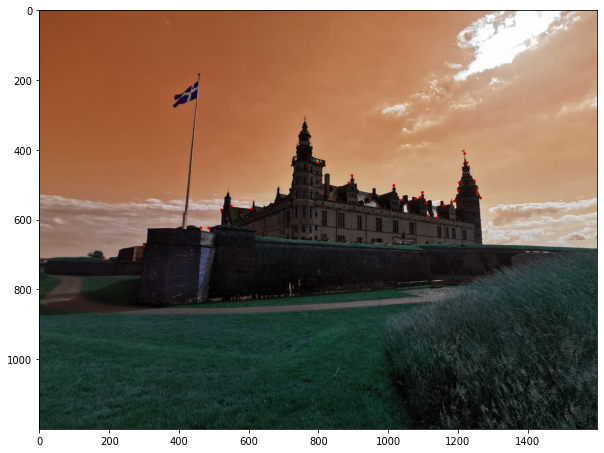

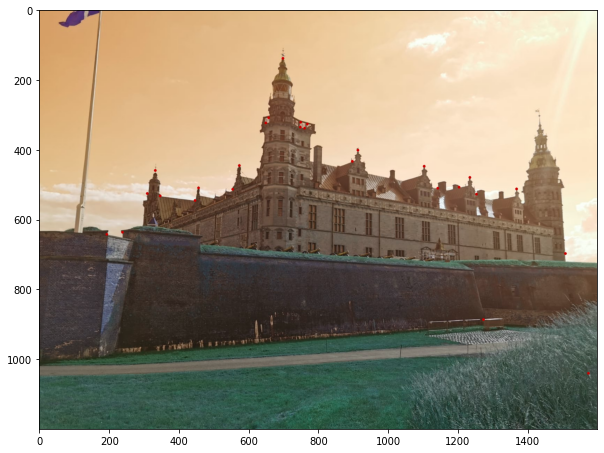

In [ ]:
path = "/content/drive/My Drive/CV_A2/"
img = cv2.imread(path +'IMG.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread(path +'IMG1.jpg')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)
corners2 = cv2.goodFeaturesToTrack(gray2, 27, 0.01, 10)
corners2 = np.int0(corners2)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 4, 200, -1)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

for i in corners2:
    x, y = i.ravel()
    cv2.circle(img2, (x, y), 4, 200, -1)

plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.show()

In [ ]:
print(len(corners))
print(len(corners2))

27
27


In [ ]:
pts_src = np.array(corners)
pts_dst = np.array(corners2)
h, status = cv2.findHomography(pts_src, pts_dst)
print("Homography matrix: ")
print(h)

Homography matrix: 
[[ 4.80505573e-02  2.37573190e-01 -1.82371058e+02]
 [-3.99996225e-02 -3.19367645e-01  2.12819653e+02]
 [-2.02914544e-04 -1.46274753e-03  1.00000000e+00]]


### EXTRA

In [ ]:
# Warp source image to destination based on homography
im_out = cv2.warpPerspective(img, h, (img2.shape[1],img2.shape[0]))

# Display images
cv2_imshow(img)
cv2_imshow(img2)
cv2_imshow(im_out)


### Another Approach

In [ ]:
X = np.array([0,2,0,1])
test1 = np.dot(extrinsic_matrix_1,X)
x1 = np.dot(intrinsic_matrix_1,test1)
print(x1)


### Q.  Now show that the two images are related by a homography i.e. the points from the first image coincide with the second image after the homography computed above. To show this, you will have to set up an error function between transformed points and original points. If they are indeed related by a homography, the error should be very low.



In [ ]:
# pts_src = [np.insert(pts_src, 2, 1, axis=1) for pts_src in pts_src]
# pts_dst = [np.insert(pts_dst, 2, 1, axis=1) for pts_dst in pts_dst]

In [ ]:
# x_normed = pts_src / pts_src.max(axis=0)
# y_normed = pts_dst / pts_dst.max(axis=0)
# RMSE calculated between the two images
print(np.sqrt((np.sum((img2 - img)**2))/(1600*1200)))

18.360758440784338
